# Visualizing the results

In [67]:
import pandas as pd
import ast
df = pd.read_csv('./data/music_analysis.csv')
df.head()


,movie,colors,instruments,emotions
0,Whiplash,"[[181, 109, 34], [95, 48, 26], [240, 175, 81],...",[],['relaxing-calm']
1,Inception,"[[74, 65, 55], [129, 127, 112], [193, 193, 172...",['Piano'],['relaxing-calm']
2,Challengers,"[[32, 125, 152], [17, 34, 15], [88, 96, 73], [...",['Piano'],['relaxing-calm']
3,PrincessMononoke,"[[153, 161, 157], [91, 94, 95], [0, 0, 0]]",[],['relaxing-calm']
4,PrincessMononoke,"[[102, 116, 132], [53, 59, 66], [167, 181, 172...",[],['relaxing-calm']


In [73]:
from sklearn.preprocessing import MultiLabelBinarizer
df = pd.read_csv('./data/music_analysis.csv')
df['instruments'] = df['instruments'].apply(ast.literal_eval)
df['emotions'] = df['emotions'].apply(ast.literal_eval)

mlb_instruments = MultiLabelBinarizer()
instruments_encoded = pd.DataFrame(mlb_instruments.fit_transform(df['instruments']),
                                   columns=mlb_instruments.classes_)

mlb_emotions = MultiLabelBinarizer()
emotions_encoded = pd.DataFrame(mlb_emotions.fit_transform(df['emotions']),
                                columns=mlb_emotions.classes_)


df_encoded = pd.concat([df[['movie']], instruments_encoded, emotions_encoded], axis=1)

#save the encoded dataframe to a csv
df_encoded.to_csv('./data/music_analysis_encoded.csv', index=False)

In [60]:
#aggregate by movie
movie_group = df.groupby('movie').agg(lambda lists: list(set(item  for item in lists ))[0]).reset_index()
movie_group['colors'] = df['colors'].apply(ast.literal_eval)
movie_group.head()

,movie,colors,instruments,emotions
0,Arrival,"[[181, 109, 34], [95, 48, 26], [240, 175, 81],...","['Violin, fiddle']",['relaxing-calm']
1,Arrival2,"[[74, 65, 55], [129, 127, 112], [193, 193, 172...",['Piano'],['relaxing-calm']
2,Challengers,"[[32, 125, 152], [17, 34, 15], [88, 96, 73], [...",['Piano'],['relaxing-calm']
3,Everything,"[[153, 161, 157], [91, 94, 95], [0, 0, 0]]",['Piano'],[]
4,Inception,"[[102, 116, 132], [53, 59, 66], [167, 181, 172...",['Piano'],['relaxing-calm']


In [63]:
movie_group['emotions'].value_counts()
movie_group['instruments'].value_counts()

instruments
['Piano']             11
[]                     3
['Violin, fiddle']     1
Name: count, dtype: int64

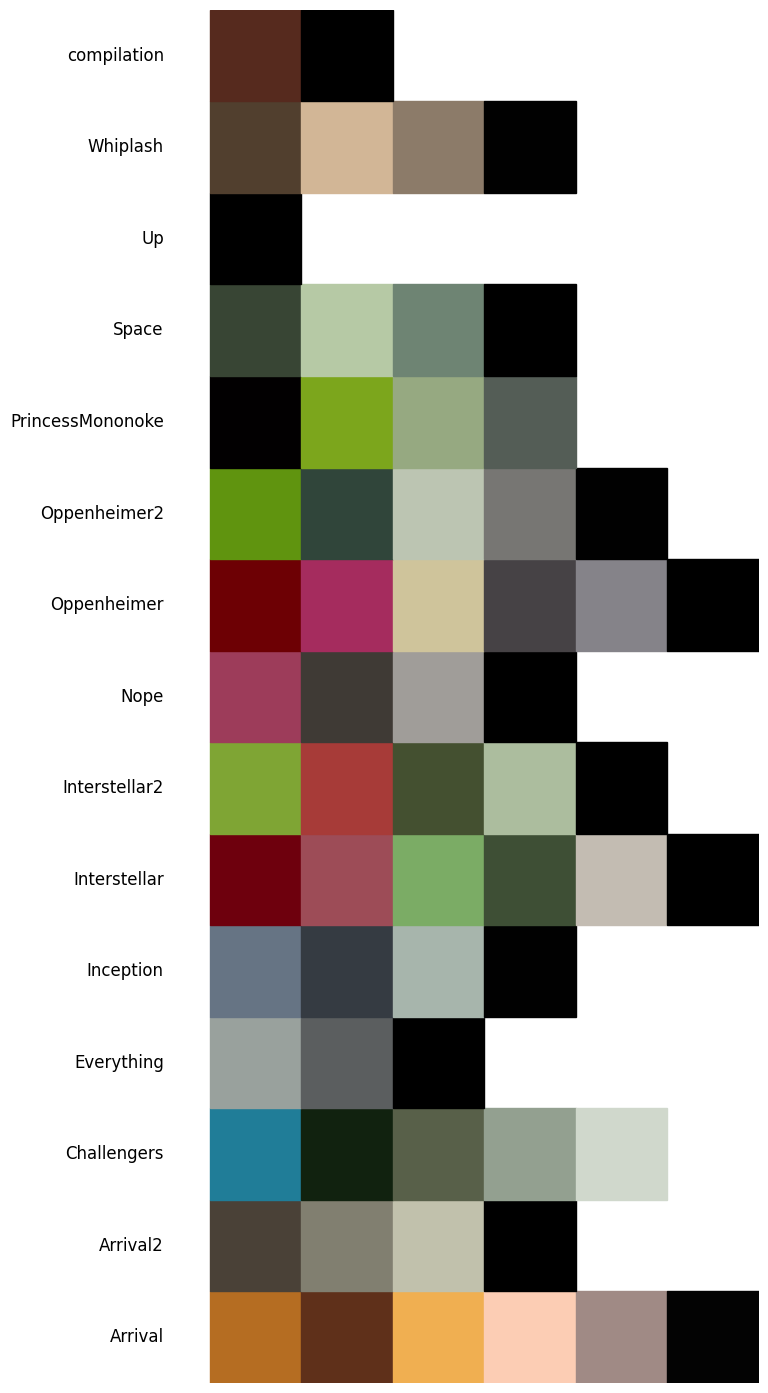

In [ ]:
import matplotlib.pyplot as plt

def normalize(colors):
    return [[r/255, g/255, b/255] for [r, g, b] in colors]

# Plot
fig, ax = plt.subplots(figsize=(8, 2 * len(movie_group)))
# df['colors'] = df['colors'].apply(ast.literal_eval)
movie_group.head()
for idx, row in movie_group.iterrows():
    colors = normalize(row['colors'])
    for i, color in enumerate(colors):
        rect = plt.Rectangle((i, idx), 1, 1, color=color)
        ax.add_patch(rect)
    ax.text(-0.5, idx + 0.5, row['movie'], va='center', ha='right', fontsize=12)

ax.set_xlim(-2, max(len(c) for c in movie_group['colors']))
ax.set_ylim(0, len(movie_group))
ax.set_aspect('equal')
ax.axis('off')

plt.tight_layout()
plt.show()

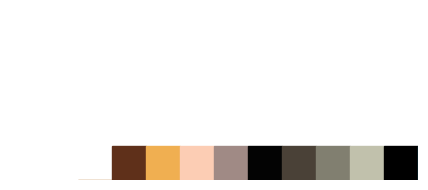

In [ ]:
#a list of colors for all movies with a sad emotion label
def plot_emotion_colors(emotion):
    emotion_colors = []
    for idx, row in df.iterrows():
        if emotion in row['emotions']:
            emotion_colors.extend(row['colors'])
    # Normalize the colors
    emotion_colors = normalize(emotion_colors)
    # Plot
    fig, ax = plt.subplots(figsize=(8, 2))
    row = -1
    for i, color in enumerate(emotion_colors):
        rect = plt.Rectangle((i, row), 1, 1, color=color)
        if i%10 == 0:
            row +=1
        ax.add_patch(rect)

    ax.set_xlim(-2, 10)
    ax.set_ylim(0, 5)
    ax.set_aspect('equal')
    ax.axis('off')
    plt.tight_layout()
    plt.show()
plot_emotion_colors('relaxing-calm')
plot_emotion_colors('')